In [2]:
# -*- coding: UTF-8 -*-
import cv2
import numpy as np
import pyshine as ps
import time
import random
import os
from gensim.models import word2vec
from matplotlib import pyplot as plt
from PIL import ImageFont, ImageDraw, Image
from ArticutAPI import Articut
from pprint import pprint
from random import choice
cv2.__version__

Warning! No module named 'sounddevice'
Warning! No module named 'keras'


'3.4.2'

In [3]:
model = word2vec.Word2Vec.load('wearebest.model')
words = list(model.wv.index_to_key)

username = "tzerjen@gmail.com" #這裡填入您在 https://api.droidtown.co 使用的帳號 email。若使用空字串，則預設使用每小時 2000 字的公用額度。
apikey   = "LgbUF#o%Rm4eHmIUi@kgx!H&2p9$IY3" #這裡填入您在 https://api.droidtown.co 登入後取得的 api Key。若使用空字串，則預設使用每小時 2000 字的公用額度。
articut = Articut(username, apikey)

In [4]:
##取出要的詞性（POS.txt）

fp = open('POS.txt', "r")
line = fp.readline()
n=0 
## 用 while 逐行讀取檔案內容，直至檔案結尾
POS = []
while line:
    n+=1
    line = line.replace("\n", "")
    POS.append(line)
    
    line = fp.readline()
print(POS)
fp.close()

['ENTITY_pronoun', 'ENTITY_noun', 'ENTITY_nouny', '#ENTITY_oov', 'ACTION_verb', 'MODIFIER', 'MODIFIER_color', 'FUNC_negation']


In [5]:
##取不能換的詞（DoNotChange.txt）
fp = open('DoNotChange.txt', "r")
line = fp.readline()
n=0 
## 用 while 逐行讀取檔案內容，直至檔案結尾
DoNotChange = []
while line:
    n+=1
    line = line.replace("\n", "")
    DoNotChange.append(line)
    line = fp.readline()
print(DoNotChange)
fp.close()
##取不好的詞（badword.txt）
fp = open('badword.txt', "r")
line = fp.readline()
n=0 
## 用 while 逐行讀取檔案內容，直至檔案結尾
badword = []
while line:
    n+=1
    line = line.replace("\n", "")
    badword.append(line)
    line = fp.readline()
print(badword)
fp.close()

['晚安', '時間', '飄', '慮', '書', '寫', '爛', '美', '翼', '迎接', '來', '謝謝', '歳', '莫名', '平', '大運', '大利', '有美', '過快', '送', '起點', '別', '路']
['孤單', '親情', '給了', '娛樂區', '迷住', '並遇', '傳真', '隨美國', '潮濕', '寒冷', '密友']


In [6]:
##取dataset（dataset.txt）
fp = open('dataset.txt', "r")
line = fp.readline()
n=0 
## 用 while 逐行讀取檔案內容，直至檔案結尾
dataset = []
while line:
    n+=1
    line = line.replace("\n", "")
    dataset.append(line)
    line = fp.readline()
fp.close()

In [7]:
#僅隨機一句
def change_word():
    result_list = []
    line = random.choice(dataset)
    result_list.append(line)
    print("原始句子：",line)
    resultDICT = articut.parse(line)
    result = ""
    for result_obj in resultDICT['result_obj'] :
        for i in result_obj :
            if(i['pos'] in POS):
                similar_word_list = []
                if i['text'] in words and i['text'] not in DoNotChange:
                    similar_word = model.wv.most_similar(i['text'])
                    print(f'target = {i["text"]}\nsimilar_word[:5]={similar_word[:5]}' )
                    for a_similar_word in similar_word[:5] :
                        if a_similar_word[1] > 0.655 and a_similar_word[0] not in badword:
                            similar_word_list.append(a_similar_word[0])
                    if similar_word_list != [] :
                        result +=random.choice(similar_word_list)
                    else :
                        result += i['text']
                else:
                    result += i['text']
            else :
                result += i['text']
    
    print("新句子：",result,"\n")
    result_list.append(result)
    result = choice(result_list)
    return result

In [8]:
def pic_picture():
    pic_path = 'lotus256_out/lotus256_out/'
    pic_file = os.listdir(pic_path)
    sample = random.sample(pic_file,1)
    img = Image.open(pic_path+sample[0])
    img = img.resize((256, 256))
    img.save('source_images/pickup.jpg')

In [346]:
#撰寫時用，可以跑整個檔案
fp = open('dataset.txt', "r")
line = fp.readline()
n=0 
def stringToList(string):
    listRes = string.split("，")
    return listRes


## 用 while 逐行讀取檔案內容，直至檔案結尾
while line:
    n+=1
    print("原始句子：",line)
    resultDICT = articut.parse(line)
    result = ""
    for result_obj in resultDICT['result_obj'] :
        for i in result_obj :
            if(i['pos'] in POS):
                print("原始:",i['text'],i['pos'])
                similar_word_list = []
                if i['text'] in words and i['text'] not in DoNotChange:
                    similar_word = model.wv.most_similar(i['text'])
                    for a_similar_word in similar_word[:5] :
                        if a_similar_word[1] > 0.655 and a_similar_word[0] not in badword:
                            similar_word_list.append(a_similar_word[0])
                        # print(similar_word_list)
                    if similar_word_list != [] :
                        result +=random.choice(similar_word_list)
                        print(f'print {random.choice(similar_word_list)}')
                    else :
                        result += i['text']
                else:
                    result += i['text']
            else :
                result += i['text']
    print("新句子：",result,"\n")
    line = fp.readline()
    # Add Line Break 
    result_list = []
    result_list = stringToList(result)
    string_size = len(result_list)
    num = 0
    for i, word in enumerate(result_list):
        result_list.insert(num+1, '\n\n')
        num+=2
        # print(f'num={num}')
        if i == string_size-1:
            break
    output_string = ''.join(result_list)
    
    # Prepare Image 
    path = 'source_images/lotus.jpg'
    img = Image.open(path)
    position = (30, 30)
    font_list = ['NotoSansTC-Black.otf', 'NotoSansTC-Medium.otf', 'NotoSerifTC-Black.otf', 'NotoSerifTC-Bold.otf',
                'NotoSerifTC-ExtraLight.otf', 'NotoSerifTC-Light.otf', 'NotoSerifTC-Medium.otf', 'NotoSerifTC-Regular.otf',
                 'NotoSerifTC-SemiBold.otf', 'TW-Kai-98_1.ttf', 'TW-Sung-98_1.ttf']
    fill = (67, 255, 20, 0)
    
    backup_img = img.copy()
    draw = ImageDraw.Draw(img)
    draw.ink = 0xDAB1D5
    # Set font style & font size
    font = ImageFont.truetype('Open_Data/Fonts/%s' %choice(font_list), 20)
    text = output_string
    draw.text( position, text, font=font, fill=fill)
    # img.show()
    img.save('generated_images/elder_%d.jpg' %n)
    img = backup_img.copy()
    if n == 3:
        break
fp.close()


原始句子： 不要滑了，早點睡

原始: 不要 FUNC_negation
print 切勿
原始: 滑 ENTITY_nouny
原始: 睡 ACTION_verb
print 睡覺
新句子： 不想滑了，早點躺  

原始句子： 早安，美好，祝你平安健康

原始: 早安 ACTION_verb
原始: 美好 MODIFIER
原始: 祝 ACTION_verb
原始: 你 ENTITY_pronoun
print 妳
原始: 平安 MODIFIER
原始: 健康 ENTITY_noun
print 心理健康
新句子： 早安，美好，祝我平安心理健康  

原始句子： "告別今日的疲憊，好好的休息，相約明日的時候，好好的加油，祝美夢成真"

原始: 告別 ACTION_verb
原始: 疲憊 MODIFIER
print 疲累
原始: 休息 ENTITY_nouny
原始: 相約 ACTION_verb
原始: 加油 ENTITY_nouny
原始: 成 ENTITY_nouny
原始: 真 MODIFIER
print 其真
新句子： "告別今日的疲累，好好的休息，相約明日的時候，好好的加油，祝美夢成其真"  



In [9]:
from IPython.display import display

原始句子： 祝大家新年快樂，虎年大吉
target = 祝
similar_word[:5]=[('聖典禮', 0.5852781534194946), ('賀會', 0.5589490532875061), ('禮成', 0.5473858714103699), ('恭喜', 0.5390390753746033), ('神恩', 0.5243787169456482)]
target = 大家
similar_word[:5]=[('眾人', 0.6069692969322205), ('觀眾們', 0.5765668153762817), ('粉絲們', 0.5711971521377563), ('同學們', 0.5709272027015686), ('我們', 0.5599537491798401)]
target = 快樂
similar_word[:5]=[('幸福', 0.6810979247093201), ('美好', 0.5903534889221191), ('甜蜜', 0.5896949768066406), ('歡樂', 0.5871036052703857), ('歡笑', 0.567594051361084)]
target = 大吉
similar_word[:5]=[('南水鄉', 0.5489093661308289), ('南西道', 0.5412523746490479), ('東薩彥', 0.5366681218147278), ('南三傑', 0.5311754941940308), ('區關子', 0.5294181108474731)]
新句子： 祝大家新年幸福，虎年大吉 

text_length = 13


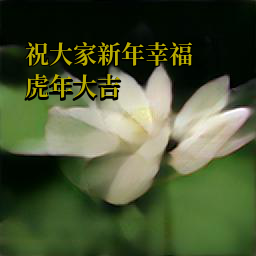

In [10]:
def stringToList(string):
    listRes = string.split("，")
    return listRes

#僅隨機一句
result = change_word()
# Add Line Break 
result_list = []
result_list = stringToList(result)
string_size = len(result_list)
num = 0
for i, word in enumerate(result_list):
    result_list.insert(num+1, '\n')
    num += 2
    if i == string_size-1:
        break
output_string = ''.join(result_list)

# Prepare Image 
pic_picture()
path = 'source_images/pickup.jpg'
img = Image.open(path)
R, G, B = np.asarray(img).mean(axis=0).mean(axis=0).astype(int)

position = (25, 35)
font_list = ['NotoSansTC-Black.otf', 'NotoSansTC-Medium.otf',
             'NotoSerifTC-Black.otf', 'NotoSerifTC-Bold.otf']
lower = 'NotoSerifTC-Black.otf'
upper = 'NotoSerifTC-Bold.otf'
fill_lower = (0, 0, 0, 0)
fill_upper = (255-R, 255-G, 0, 0)
font_size = 24
backup_img = img.copy()
draw = ImageDraw.Draw(img)

# Set font style & font size
text = output_string
text_length = len(text)
print(f'text_length = {text_length}')
if text_length >= 17:
    font_size = 20
    position = (10, 25)

font_tmp = choice(font_list)
font_lower = ImageFont.truetype('Open_Data/Fonts/%s' % lower, font_size)
font_upper = ImageFont.truetype('Open_Data/Fonts/%s' % upper, font_size)

draw.text( position, text, font=font_lower, fill=fill_lower ,stroke_width=1)
draw.text( position, text, font=font_upper, fill=fill_upper ,stroke_width=0)
display(img)
img.save('generated_images/elder.jpg')
img = backup_img.copy()


